# **Linear Regression Prediction Model 🤖**
Here's my code which evaluates `Data HSS.csv` and generates a simple linear regression model to predict sales figures when radio marketing budget increases for a fictional company:

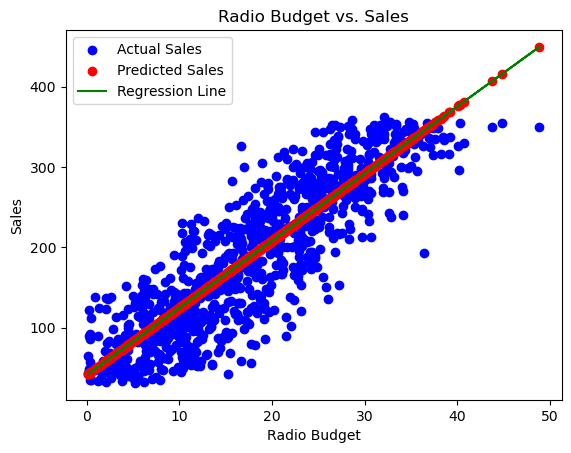


    Linear Regression Model Report:
    -------------------------------
    Slope (Coefficient): 8.356256526785286
    Intercept: 40.99699782153965
    Mean Absolute Error (MAE): 36.40510911455355
    R-squared (R2) Score: 0.752048806458208
    
    Insights: Predicted sales increase as the radio budget increases.
    But does not account for ceiling effect that occurs around 300 in Radio Budget.    
    


In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
def load_data(file_path):
    data = pd.read_csv(file_path)
    # Inspect for missing values and handle them
    if data.isnull().values.any():
        # Fill missing values with column mean
        data = data.fillna(data.mean(numeric_only=True))
    return data

# Split into 80% training and 20% testing
def split_data(data, test_size=0.2):
    # Define features and target variable
    X = data[['Radio']]
    y = data['Sales']
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    return X_train, X_test, y_train, y_test

# Use LinearRegression from scikit-learn
# Train model using only the radio budget as input(X)
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model
# Predict Sales (Y) on test set
def predict_sales(model, X_test):
    y_pred = model.predict(X_test)
    return y_pred

# Calculate and display:
# - Mean Absolute Error (MAE)
def calculate_mae(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    return mae
# - R-squared (R2) Score
def calculate_r2(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    return r2
# Output:
# - Slope (coefficient) of the regression line
def get_slope(model):
    slope = model.coef_[0]
    return slope
# - Intercept
def get_intercept(model):
    intercept = model.intercept_
    return intercept

# Visualization:
# - Create a scatter plot of:
#   - Actual Sales vs. Predicted Sales
# Overlay the regression line on a plot of Radio Budget vs. Sales
def plot_results(X_test, y_test, y_pred, slope, intercept):
    plt.scatter(X_test, y_test, color='blue', label='Actual Sales')
    plt.scatter(X_test, y_pred, color='red', label='Predicted Sales')
    plt.plot(X_test, slope * X_test + intercept, color='green', label='Regression Line')
    plt.xlabel('Radio Budget')
    plt.ylabel('Sales')
    plt.title('Radio Budget vs. Sales')
    plt.legend()
    plt.show()

# Report Generation:
# Include:
# - Model coefficients (slope and intercept)
# - Performance metrics (MAE, R2)
# - Any insights(e.g. "Sales increase as Radio Budget increases")
def generate_report(slope, intercept, mae, r2):
    report = f"""
    Linear Regression Model Report:
    -------------------------------
    Slope (Coefficient): {slope}
    Intercept: {intercept}
    Mean Absolute Error (MAE): {mae}
    R-squared (R2) Score: {r2}
    
    Insights: Predicted sales increase as the radio budget increases.
    But does not account for ceiling effect that occurs around 300 in Radio Budget.    
    """
    print(report)

def main():
    # Load the dataset
    data = load_data('Data_HSS.csv')
    
    # Split the data
    X_train, X_test, y_train, y_test = split_data(data)
    
    # Train the model
    model = train_model(X_train, y_train)
    
    # Predict sales
    y_pred = predict_sales(model, X_test)
    
    # Calculate performance metrics
    mae = calculate_mae(y_test, y_pred)
    r2 = calculate_r2(y_test, y_pred)
    
    # Get slope and intercept
    slope = get_slope(model)
    intercept = get_intercept(model)
    
    # Plot results
    plot_results(X_test, y_test, y_pred, slope, intercept)
    
    # Generate report
    generate_report(slope, intercept, mae, r2)

if __name__ == "__main__":
    main()